In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.iolib.summary2 import summary_col
from tabulate import tabulate

In [8]:
data = pd.read_pickle("data/data_only")
data

,Time,House_price,Gold_price,Fixed_deposit_rate,Shanghai_stock_index,core_CPI,headline_CPI,core_inflation,headline_inflation,government_bond_yield_sixm,government_bond_yield_fivey,government_bond_yield_teny
0,2010-03-31,6399,243.91,4.15,3109.1050,84.476667,77.396667,0.002730,0.019406,0.014136,0.027923,0.034818
1,2010-06-30,6657,271.60,4.15,2398.3700,84.753333,77.286667,0.003275,-0.001421,0.021017,0.023997,0.032790
2,2010-09-30,7049,282.35,4.15,2655.6580,84.993333,77.723333,0.002832,0.005650,0.018884,0.023473,0.033183
3,2010-12-31,7492,301.11,4.15,2808.0770,85.586667,79.446667,0.006981,0.022173,0.023580,0.025526,0.027141
4,2011-03-31,7845,302.07,4.50,2928.1110,86.203333,81.393333,0.007205,0.024503,0.027008,0.032328,0.039120
5,2011-06-30,7779,314.32,4.75,2762.0760,86.680000,81.826667,0.005530,0.005324,0.034127,0.034700,0.038957
6,2011-09-30,7542,338.08,5.00,2359.2200,86.956667,82.730000,0.003192,0.011040,0.034729,0.037119,0.038605
7,2011-12-31,7026,319.49,5.00,2199.4170,87.153333,83.140000,0.002262,0.004956,0.026641,0.030376,0.034303
8,2012-03-31,7562,339.13,5.00,2262.7880,87.383333,84.503333,0.002639,0.016398,0.027685,0.029225,0.035004
9,2012-06-30,7814,322.25,4.65,2225.4310,87.770000,84.163333,0.004425,-0.004024,0.022184,0.029143,0.033253


# **Original Data Analysis**

In [42]:
c1 = ["House_price", "Gold_price", "Fixed_deposit_rate", "Shanghai_stock_index", 
      "government_bond_yield_sixm", "government_bond_yield_fivey", "government_bond_yield_teny"]

# Calculate summary statistics
summary_data = data[c1].agg(['mean', 'std', 'min', 'max']).transpose()
summary_data.columns = ['Mean', 'SD', 'Min', 'Max']

# print it in a more readable format for non-LaTeX use:
print(tabulate(summary_data, headers='keys', tablefmt='grid', floatfmt=".2f"))

+-----------------------------+----------+---------+---------+----------+
|                             |     Mean |      SD |     Min |      Max |
+=============================+==========+=========+=========+==========+
| House_price                 | 15028.98 | 5971.00 | 6399.00 | 23006.00 |
+-----------------------------+----------+---------+---------+----------+
| Gold_price                  |   291.59 |   47.02 |  222.99 |   402.64 |
+-----------------------------+----------+---------+---------+----------+
| Fixed_deposit_rate          |     3.65 |    0.72 |    3.00 |     5.00 |
+-----------------------------+----------+---------+---------+----------+
| Shanghai_stock_index        |  2812.79 |  517.08 | 1979.21 |  4277.22 |
+-----------------------------+----------+---------+---------+----------+
| government_bond_yield_sixm  |     0.03 |    0.01 |    0.01 |     0.04 |
+-----------------------------+----------+---------+---------+----------+
| government_bond_yield_fivey |     0.

# **Regression Analysis**

In [31]:
# Adding a constant to the data for the intercept
data['Intercept'] = 1

## **Original formular**

In [32]:
# Define and fit the models
lm_house_on_others = sm.OLS(data['House_price'], data[['Intercept', 'Gold_price', 'Fixed_deposit_rate', 'Shanghai_stock_index', 'government_bond_yield_sixm', 'government_bond_yield_fivey', 'government_bond_yield_teny']]).fit()
lm_gold_on_others = sm.OLS(data['Gold_price'], data[['Intercept', 'House_price', 'Fixed_deposit_rate', 'Shanghai_stock_index', 'government_bond_yield_sixm', 'government_bond_yield_fivey', 'government_bond_yield_teny']]).fit()
lm_fixed_on_others = sm.OLS(data['Fixed_deposit_rate'], data[['Intercept', 'House_price', 'Gold_price', 'Shanghai_stock_index', 'government_bond_yield_sixm', 'government_bond_yield_fivey', 'government_bond_yield_teny']]).fit()
lm_stock_on_others = sm.OLS(data['Shanghai_stock_index'], data[['Intercept', 'House_price', 'Gold_price', 'Fixed_deposit_rate', 'government_bond_yield_sixm', 'government_bond_yield_fivey', 'government_bond_yield_teny']]).fit()
lm_sixm_on_others = sm.OLS(data['government_bond_yield_sixm'], data[['Intercept', 'House_price', 'Gold_price', 'Fixed_deposit_rate', 'Shanghai_stock_index', 'government_bond_yield_fivey', 'government_bond_yield_teny']]).fit()
lm_fivey_on_others = sm.OLS(data['government_bond_yield_fivey'], data[['Intercept', 'House_price', 'Gold_price', 'Fixed_deposit_rate', 'Shanghai_stock_index', 'government_bond_yield_sixm', 'government_bond_yield_teny']]).fit()
lm_teny_on_others = sm.OLS(data['government_bond_yield_teny'], data[['Intercept', 'House_price', 'Gold_price', 'Fixed_deposit_rate', 'Shanghai_stock_index', 'government_bond_yield_sixm', 'government_bond_yield_fivey']]).fit()

# Store the models in lists
models_all = [lm_house_on_others, lm_gold_on_others, lm_fixed_on_others, lm_stock_on_others]
model_names_all = ["house", "gold", "fixed", "stock"]

models_2 = [lm_sixm_on_others, lm_fivey_on_others, lm_teny_on_others]
model_names_2 = ["sixm", "fivey", "teny"]

### Print the summaries

models all

In [33]:
summary_col(models_all, stars=True, model_names=model_names_all)

,house,gold,fixed,stock
Fixed_deposit_rate,-8675.7179***,109.5068***,,-827.0642***
,(645.1466),(24.0572),,(303.7778)
Gold_price,31.8666***,,0.0033***,-0.1582
,(6.7757),,(0.0007),(1.8208)
House_price,,0.0117***,-0.0001***,-0.0458
,,(0.0025),(0.0000),(0.0341)
Intercept,31038.4193***,-62.3011,3.4479***,6421.4212***
,(5218.5608),(139.7213),(0.5160),(1137.3337)
R-squared,0.9158,0.4997,0.9359,0.4924
R-squared Adj.,0.9021,0.4185,0.9256,0.4101


model 2

In [34]:
summary_col(models_2, stars=True, model_names=model_names_2)

,sixm,fivey,teny
Fixed_deposit_rate,0.0058**,-0.0001,0.0016
,(0.0027),(0.0013),(0.0013)
Gold_price,-0.0000,-0.0000,-0.0000
,(0.0000),(0.0000),(0.0000)
House_price,0.0000*,0.0000,-0.0000
,(0.0000),(0.0000),(0.0000)
Intercept,-0.0144,-0.0046,0.0072
,(0.0132),(0.0061),(0.0062)
R-squared,0.7422,0.9131,0.8914
R-squared Adj.,0.7004,0.8990,0.8738


## **Correlation Matrix**

In [30]:
col_corr = ["House_price", "Gold_price", "Fixed_deposit_rate", "Shanghai_stock_index",
            "government_bond_yield_sixm", "government_bond_yield_fivey", "government_bond_yield_teny"]
data_corr = data[col_corr]
correlation_matrix = data_corr.corr()
correlation_matrix

,House_price,Gold_price,Fixed_deposit_rate,Shanghai_stock_index,government_bond_yield_sixm,government_bond_yield_fivey,government_bond_yield_teny
House_price,1.000000,0.156922,-0.893623,0.472779,-0.072940,-0.087056,-0.349094
Gold_price,0.156922,1.000000,0.024420,-0.135163,-0.245160,-0.290878,-0.321347
Fixed_deposit_rate,-0.893623,0.024420,1.000000,-0.654409,0.311045,0.306596,0.518734
Shanghai_stock_index,0.472779,-0.135163,-0.654409,1.000000,-0.314742,-0.285370,-0.375236
government_bond_yield_sixm,-0.072940,-0.245160,0.311045,-0.314742,1.000000,0.830680,0.711165
government_bond_yield_fivey,-0.087056,-0.290878,0.306596,-0.285370,0.830680,1.000000,0.898867
government_bond_yield_teny,-0.349094,-0.321347,0.518734,-0.375236,0.711165,0.898867,1.000000


<Axes: >

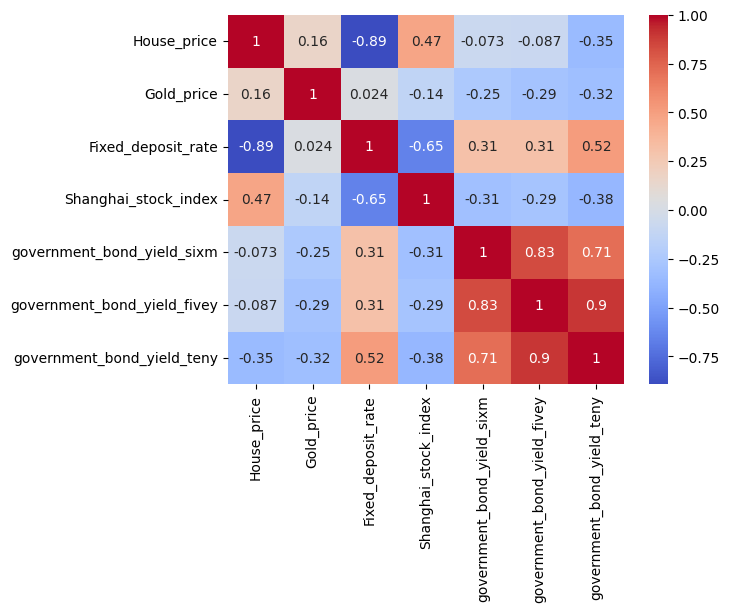

In [7]:
# In heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

## **New Regression Formular Without Assets with Weak Correlation**

according correlation and p valuse adjust the model if 0.00 to 0.19: Very weak correlation

In [35]:
# Defining the models
model_formulas = {
    "house": "House_price ~ np.log1p(core_inflation) + Gold_price + Fixed_deposit_rate + Shanghai_stock_index + government_bond_yield_sixm + government_bond_yield_teny",
    "gold": "Gold_price ~ np.log1p(core_inflation) + House_price + Fixed_deposit_rate + government_bond_yield_sixm + government_bond_yield_fivey + government_bond_yield_teny",
    "fixed": "Fixed_deposit_rate ~ np.log1p(core_inflation) + House_price + Gold_price + Shanghai_stock_index + government_bond_yield_sixm + government_bond_yield_fivey + government_bond_yield_teny",
    "stock": "Shanghai_stock_index ~ np.log1p(core_inflation) + House_price + Fixed_deposit_rate + government_bond_yield_sixm + government_bond_yield_fivey + government_bond_yield_teny",
    "sixm": "government_bond_yield_sixm ~ np.log1p(core_inflation) + House_price + Gold_price + Fixed_deposit_rate + Shanghai_stock_index + government_bond_yield_fivey + government_bond_yield_teny",
    "fivey": "government_bond_yield_fivey ~ np.log1p(core_inflation) + Gold_price + Fixed_deposit_rate + Shanghai_stock_index + government_bond_yield_sixm + government_bond_yield_teny",
    "teny": "government_bond_yield_teny ~ np.log1p(core_inflation) + House_price + Gold_price + Fixed_deposit_rate + Shanghai_stock_index + government_bond_yield_sixm + government_bond_yield_fivey"
}

# Creating and fitting the models
models = {name: sm.OLS.from_formula(formula, data).fit() for name, formula in model_formulas.items()}

# Grouping the models for summary
models_all_new = [models["house"], models["gold"], models["fixed"], models["stock"]]
model_names_all = ["house", "gold", "fixed", "stock"]

models_2_new = [models["sixm"], models["fivey"], models["teny"]]
model_names_2 = ["sixm", "fivey", "teny"]

### Displaying the summaries

new model all

In [36]:
summary_col(models_all_new, model_names=model_names_all, stars=True)

,house,gold,fixed,stock
Fixed_deposit_rate,-8992.5721***,102.4466***,,-822.5296***
,(592.2090),(20.1035),,(232.3894)
Gold_price,33.0996***,,0.0034***,
,(7.2974),,(0.0008),
House_price,,0.0108***,-0.0001***,-0.0450
,,(0.0024),(0.0000),(0.0272)
Intercept,30917.9377***,-15.3365,3.3953***,6283.2059***
,(5447.8730),(101.8809),(0.5446),(1177.7096)
R-squared,0.9131,0.5429,0.9361,0.4950
R-squared Adj.,0.8990,0.4688,0.9237,0.4131


new model 2

In [37]:
summary_col(models_2_new, model_names=model_names_2, stars=True)

,sixm,fivey,teny
Fixed_deposit_rate,0.0056**,-0.0015***,0.0017
,(0.0028),(0.0005),(0.0014)
Gold_price,-0.0000,0.0000,-0.0000
,(0.0000),(0.0000),(0.0000)
House_price,0.0000*,,-0.0000
,(0.0000),,(0.0000)
Intercept,-0.0155,0.0000,0.0075
,(0.0135),(0.0046),(0.0064)
R-squared,0.7448,0.9103,0.8917
R-squared Adj.,0.6951,0.8957,0.8706


# **Assumption Check**

In [46]:
def check_assumptions(model):
    # Check Linearity
    # Plotting the observed vs predicted values
    plt.scatter(model.fittedvalues, model.model.endog)
    plt.xlabel('Predicted values')
    plt.ylabel('Observed values')
    plt.title('Check for Linearity')
    plt.show()

    # Check Independence of Residuals
    # Plotting the residuals vs predicted values
    plt.scatter(model.fittedvalues, model.resid)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Check for Independence of Residuals')
    plt.show()

    # Check Homoscedasticity
    # Plotting the predicted values vs residuals
    plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)))
    plt.xlabel('Predicted values')
    plt.ylabel('Sqrt of the Absolute Residuals')
    plt.title('Check for Homoscedasticity')
    plt.show()

    # Check Normality of Residuals
    # Histogram of the residuals
    plt.hist(model.resid, bins=30)
    plt.title('Histogram of Residuals')
    plt.show()

    # QQ plot
    sm.qqplot(model.resid, line='s')
    plt.title('QQ Plot')
    plt.show()

    # Check Multicollinearity
    # Calculating VIF for each variable
    X = model.model.exog
    vif_data = pd.DataFrame()
    vif_data["feature"] = model.model.exog_names
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    print(vif_data)

Assumption checks for house model


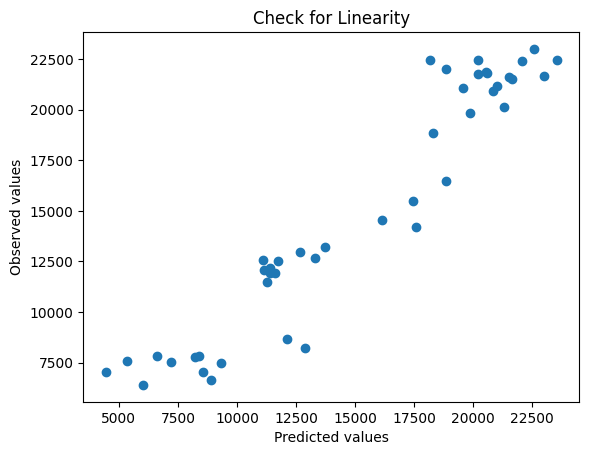

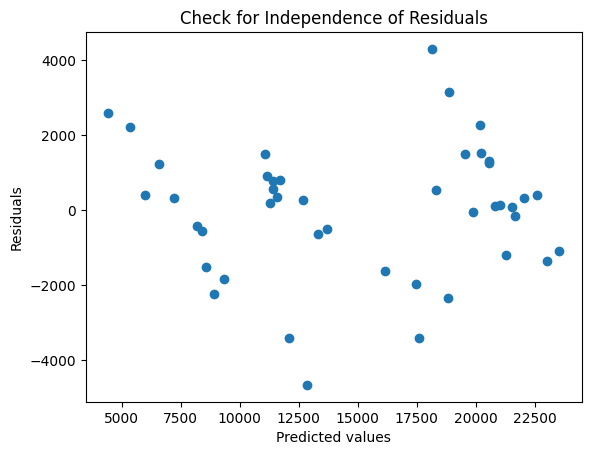

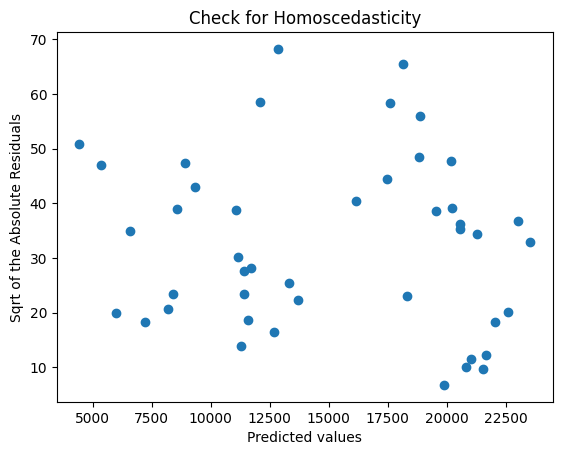

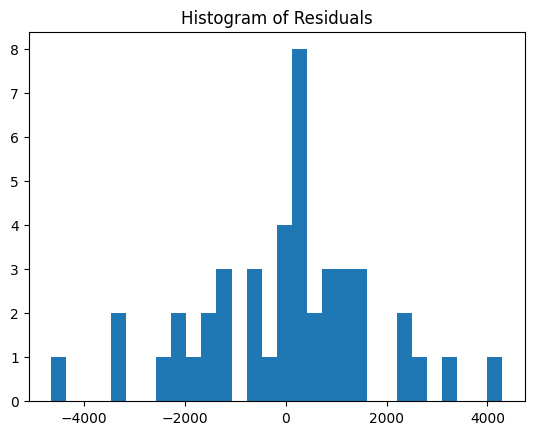

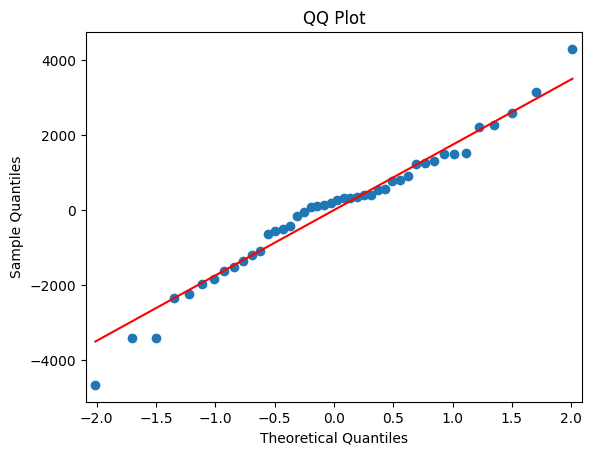

                      feature         VIF
0                   Intercept  362.684722
1    np.log1p(core_inflation)    1.209582
2                  Gold_price    1.405958
3          Fixed_deposit_rate    2.164977
4        Shanghai_stock_index    1.882603
5  government_bond_yield_sixm    2.139429
6  government_bond_yield_teny    2.795994

--------------------------------------------------

Assumption checks for gold model


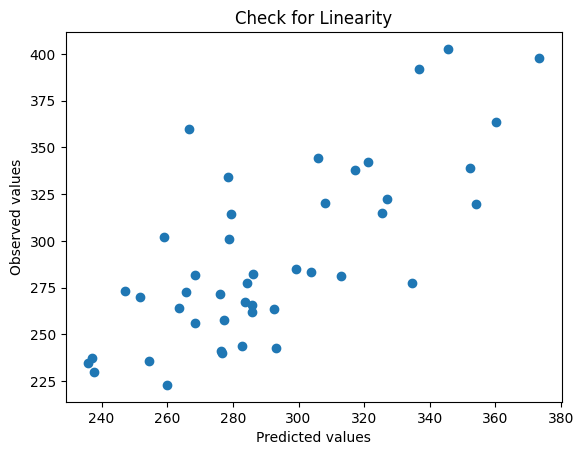

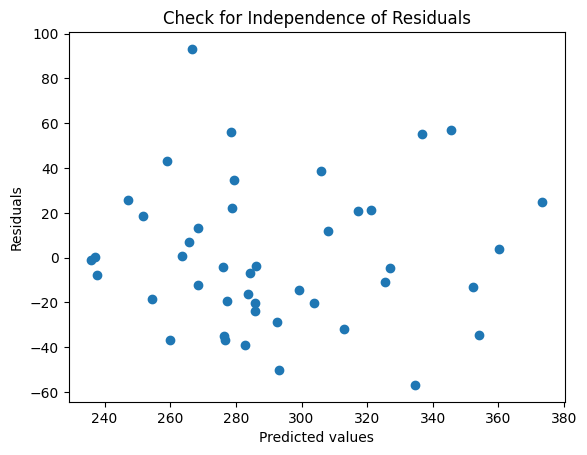

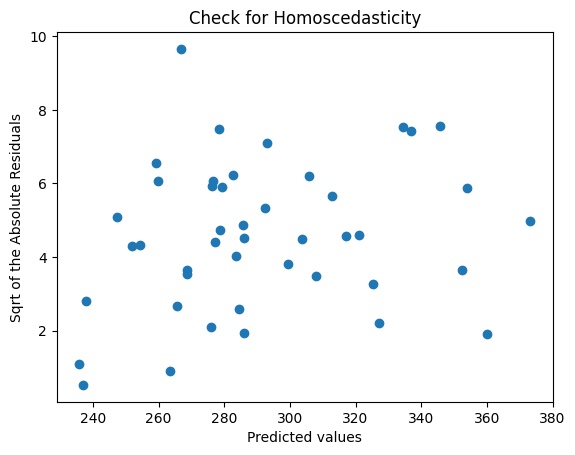

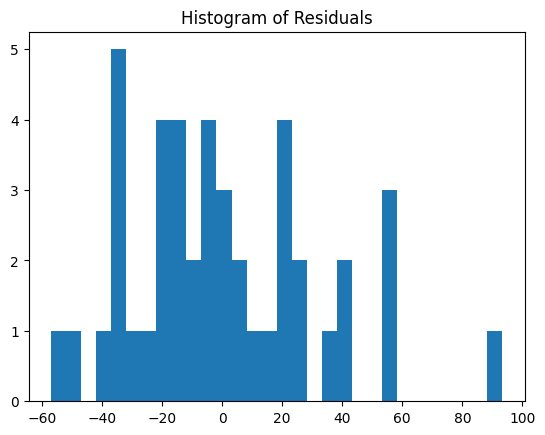

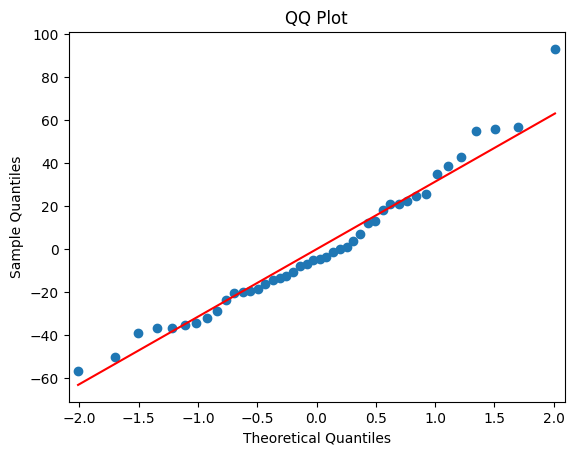

                       feature         VIF
0                    Intercept  388.882945
1     np.log1p(core_inflation)    1.099640
2                  House_price    7.215809
3           Fixed_deposit_rate    7.648971
4   government_bond_yield_sixm    3.727101
5  government_bond_yield_fivey   11.504603
6   government_bond_yield_teny    8.865847

--------------------------------------------------

Assumption checks for fixed model


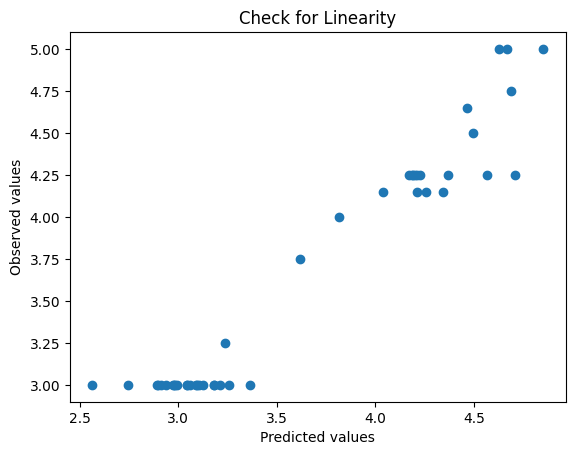

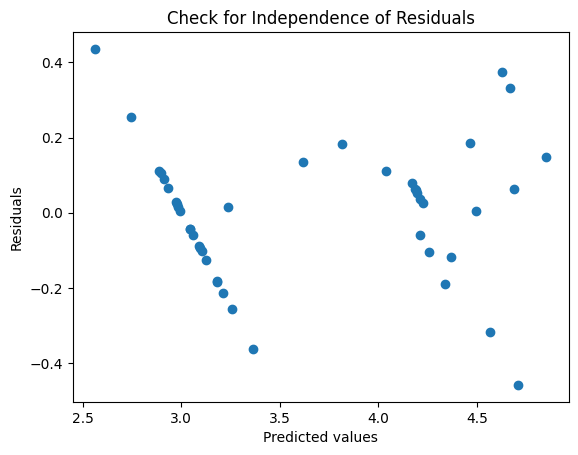

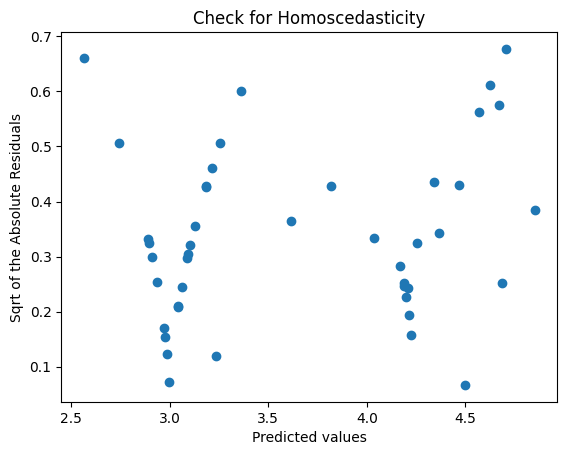

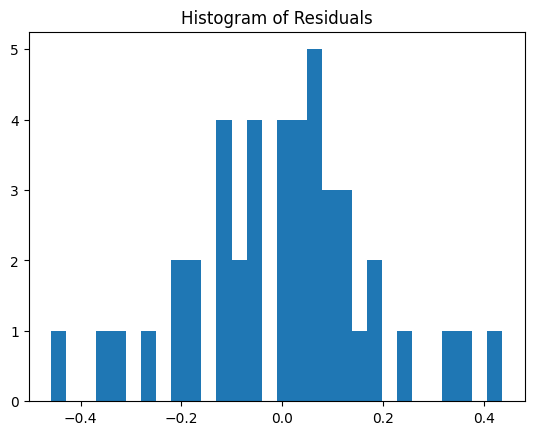

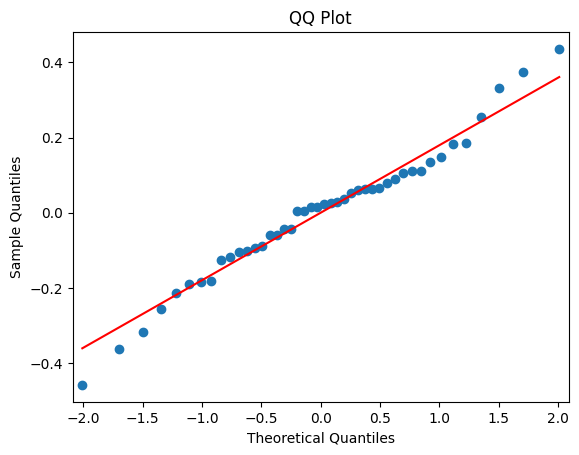

                       feature         VIF
0                    Intercept  331.025014
1     np.log1p(core_inflation)    1.206055
2                  House_price    2.031266
3                   Gold_price    1.430328
4         Shanghai_stock_index    1.645871
5   government_bond_yield_sixm    3.514874
6  government_bond_yield_fivey   11.503194
7   government_bond_yield_teny    8.858466

--------------------------------------------------

Assumption checks for stock model


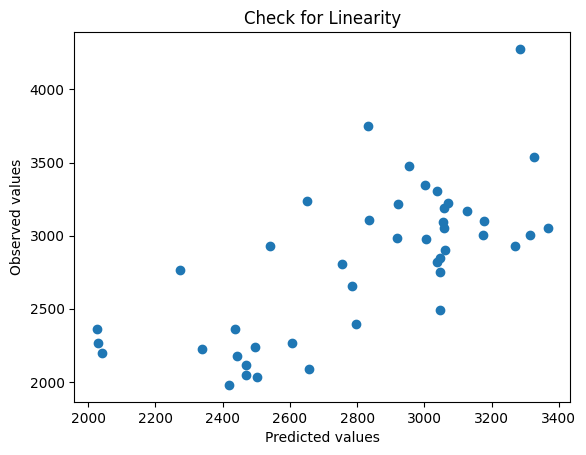

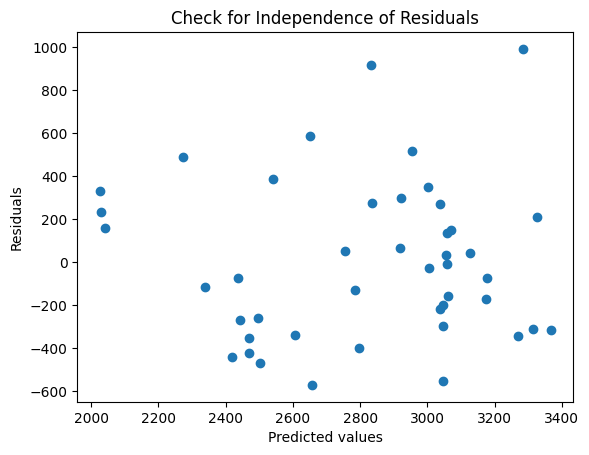

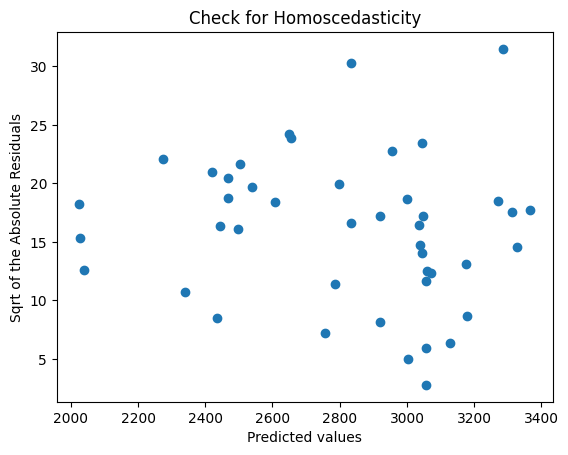

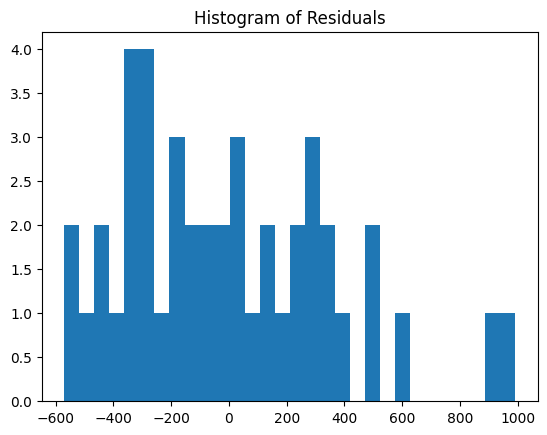

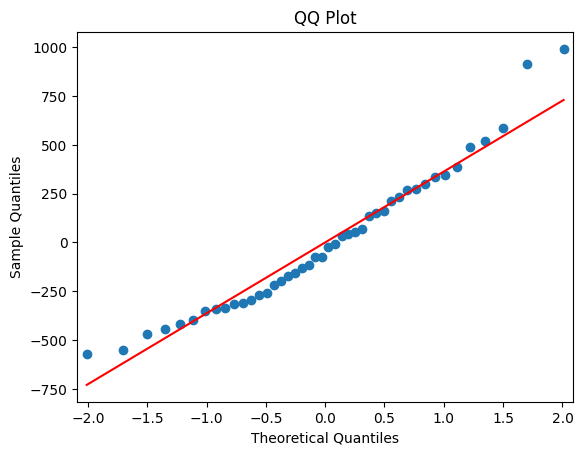

                       feature         VIF
0                    Intercept  388.882945
1     np.log1p(core_inflation)    1.099640
2                  House_price    7.215809
3           Fixed_deposit_rate    7.648971
4   government_bond_yield_sixm    3.727101
5  government_bond_yield_fivey   11.504603
6   government_bond_yield_teny    8.865847

--------------------------------------------------

Assumption checks for sixm model


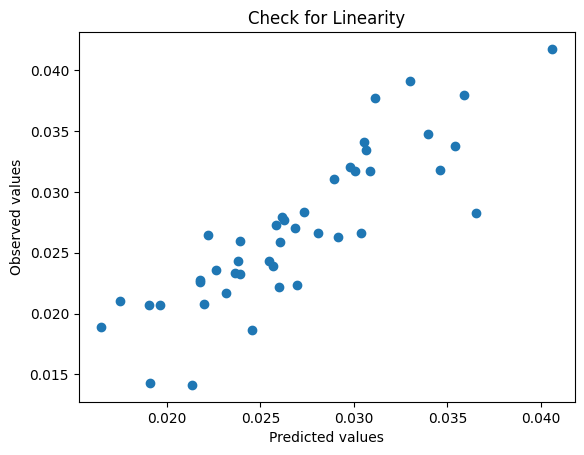

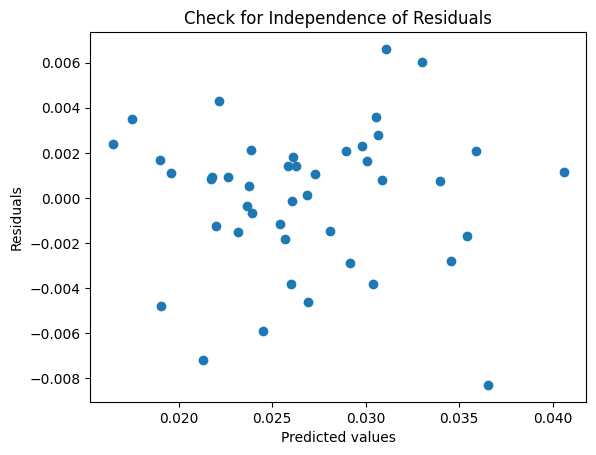

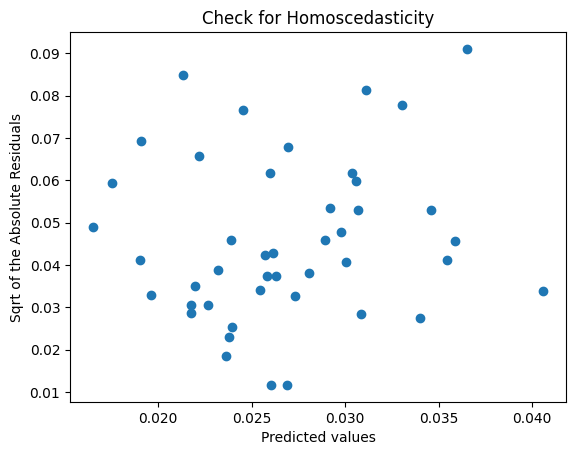

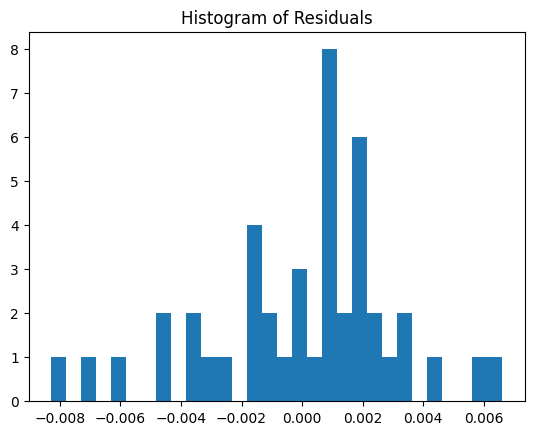

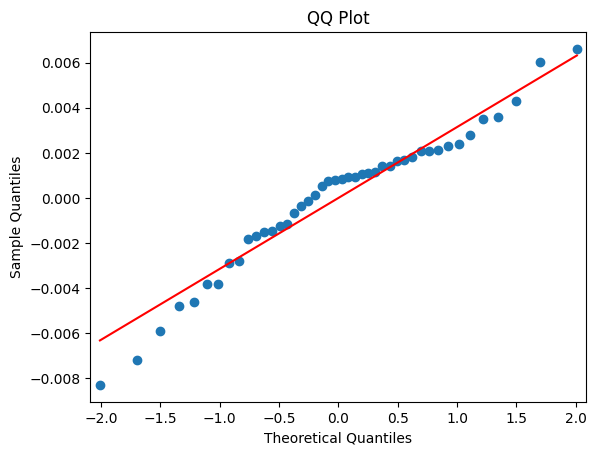

                       feature         VIF
0                    Intercept  664.045229
1     np.log1p(core_inflation)    1.197912
2                  House_price   10.911146
3                   Gold_price    2.083539
4           Fixed_deposit_rate   14.049989
5         Shanghai_stock_index    1.978271
6  government_bond_yield_fivey    8.023428
7   government_bond_yield_teny    8.712336

--------------------------------------------------

Assumption checks for fivey model


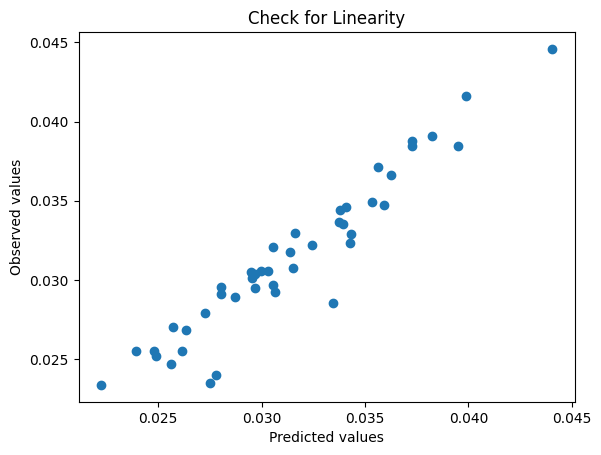

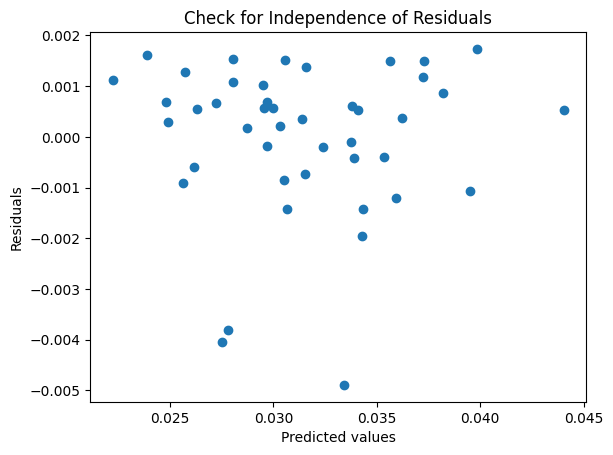

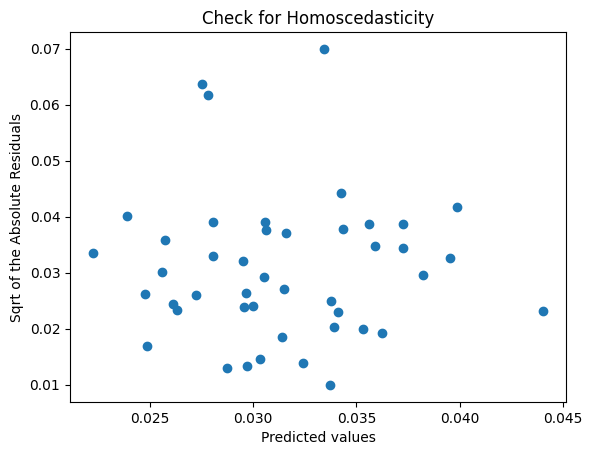

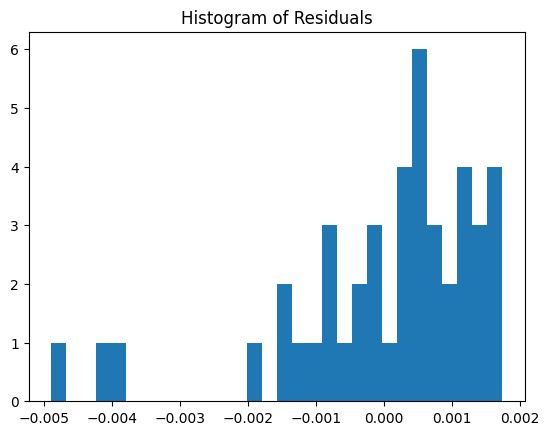

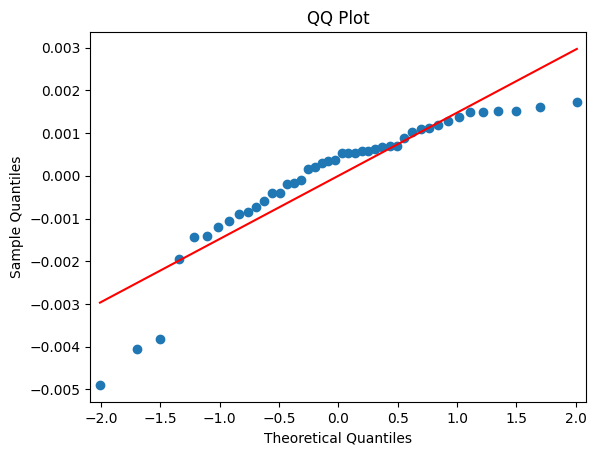

                      feature         VIF
0                   Intercept  362.684722
1    np.log1p(core_inflation)    1.209582
2                  Gold_price    1.405958
3          Fixed_deposit_rate    2.164977
4        Shanghai_stock_index    1.882603
5  government_bond_yield_sixm    2.139429
6  government_bond_yield_teny    2.795994

--------------------------------------------------

Assumption checks for teny model


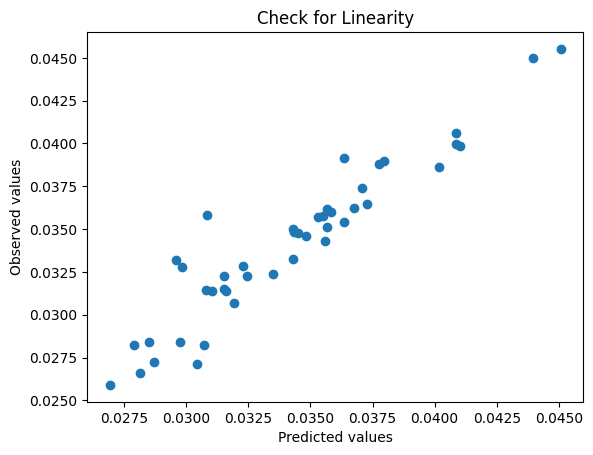

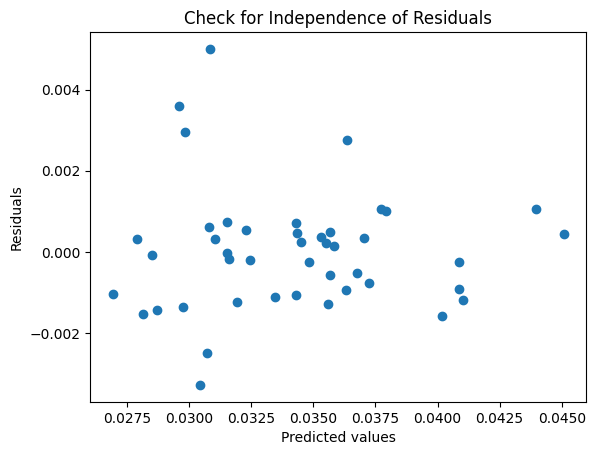

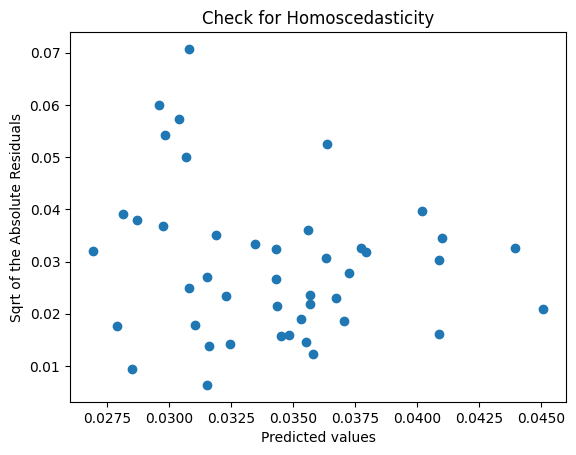

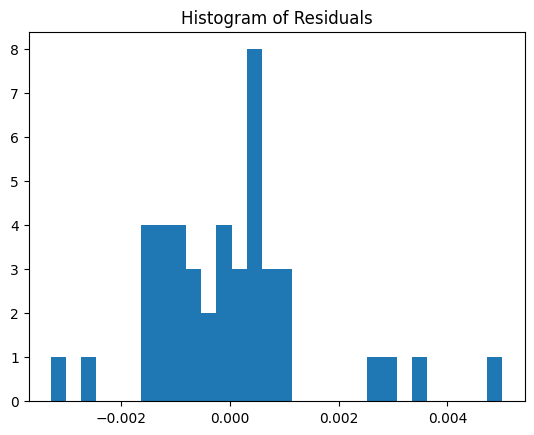

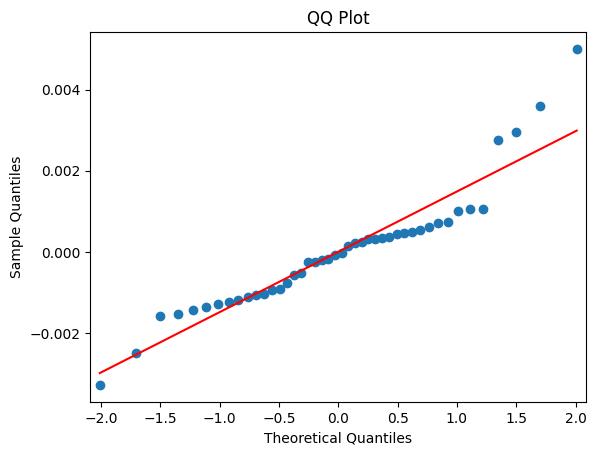

                       feature         VIF
0                    Intercept  663.199301
1     np.log1p(core_inflation)    1.206696
2                  House_price   11.863029
3                   Gold_price    2.104364
4           Fixed_deposit_rate   15.027001
5         Shanghai_stock_index    1.976857
6   government_bond_yield_sixm    3.697279
7  government_bond_yield_fivey    3.627207

--------------------------------------------------



In [47]:
# Looping through each model in 'models_all_new' and 'models_2_new'
for model_name, model in models.items():
    print(f"Assumption checks for {model_name} model")
    check_assumptions(model)
    print("\n" + "-"*50 + "\n")